## Problem Statement
Customer retention is as crucial as customer acquistion when it comes to increasing revenue. Also we know ,it is much more expensive to sign in a new client than keeping an existing one.

It is advantageous for bank to know what lead a client towards the decision to leave the company .Also churn prediction allows companies to develops loyalty programs and retension campaigns to keep as many customers as possible so we have 3 tasks:

1. Analyze the customer churn rate for bank because it is useful to understand why customer leave.

2. Predictive behaviour modelling i.e, to classify if a customer is going to churn or not.

3. Choose the most reliable model that will attach a portability to the churn to make it easier for customer service to target right customer in order to minimize their efforts to pevent churn.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Importing Dataset

In [2]:
df = pd.read_csv("C:\\Users\\tanis\\OneDrive\\Documents\\Bank Churn.csv")

In [3]:
df.head() #top 5 records

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.tail() #bottom 5 records

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### Understanding Data 

In [5]:
df.shape

(10000, 13)

In [6]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn'],
      dtype='object')

In [7]:
df.info() #shows data type of columns and non-null values present 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


### Unique values in each Column

In [8]:
df.nunique()

CustomerId          10000
Surname              2932
CreditScore           460
Geography               3
Gender                  2
Age                    70
Tenure                 11
Balance              6382
Num Of Products         4
Has Credit Card         2
Is Active Member        2
Estimated Salary     9999
Churn                   2
dtype: int64

### Null Value Check

In [9]:
df.isna().sum()

CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
Num Of Products     0
Has Credit Card     0
Is Active Member    0
Estimated Salary    0
Churn               0
dtype: int64

### Duplication Check

In [10]:
df[df.duplicated()]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn


### Numerical Columns

In [11]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Categorical Columns

In [12]:
df.describe(include='object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


## Pre-pocessing of Data

### Dropping insignificant columns

In [13]:
df.drop(columns= ['CustomerId','Surname'],inplace=True)

### Transforming Estimated Salary Column (for EDA)

In [14]:
conditions=[
    (df['Estimated Salary']<=25000),
    (df['Estimated Salary']>25000) & (df['Estimated Salary']<=50000),
    (df['Estimated Salary']>50000) & (df['Estimated Salary']<=75000),
    (df['Estimated Salary']>75000) & (df['Estimated Salary']<=100000),
    (df['Estimated Salary']>100000) & (df['Estimated Salary']<=125000),
    (df['Estimated Salary']>125000) & (df['Estimated Salary']<=150000),
    (df['Estimated Salary']>150000) & (df['Estimated Salary']<=175000),
    (df['Estimated Salary']>175000) & (df['Estimated Salary']<=200000)
]

values= ['Less than 25,000','25,000-50,000','50,000-75,000','75,000-1,00,000','1,00,000-1,25,000','1,25,000-1,50,000','1,50,000-1,75,000','1,75,000-2,00,000']

df['SalaryRange']=np.select(conditions,values)

In [15]:
df['SalaryRange'].value_counts()

SalaryRange
1,25,000-1,50,000    1279
1,00,000-1,25,000    1276
50,000-75,000        1269
75,000-1,00,000      1268
1,75,000-2,00,000    1260
25,000-50,000        1236
Less than 25,000     1217
1,50,000-1,75,000    1195
Name: count, dtype: int64

### Transforming Age Column (For EDA)

In [16]:
conditions=[
    (df['Age']>=0) & (df['Age']<18),
    (df['Age']>=18) & (df['Age']<30),
    (df['Age']>=30) & (df['Age']<40),
    (df['Age']>=40) & (df['Age']<50),
    (df['Age']>=50) & (df['Age']<60),
    (df['Age']>=60)
]
values=['Minors','18-30','30-40','40-50','50-60','Above 60']
df['AgeGroup']=np.select(conditions,values)

In [17]:
df.AgeGroup.value_counts()

AgeGroup
30-40       4346
40-50       2618
18-30       1641
50-60        869
Above 60     526
Name: count, dtype: int64

### Univariate Analysis

<Figure size 6000x10000 with 0 Axes>

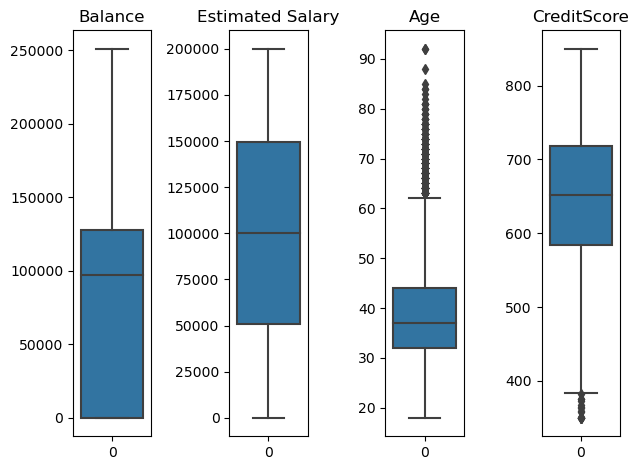

In [18]:
 plt.figure(figsize=(60, 100)) 
# Store the list of columns 
columns_to_plot = ['Balance', 'Estimated Salary', 'Age', 'CreditScore'] 
 
# Create the figure and two subplots 
fig, axes = plt.subplots(ncols=len(columns_to_plot)) 
 
# Create the boxplot with Seaborn 
for column, axis in zip(columns_to_plot, axes): 
        sns.boxplot(data=df[column], ax=axis)  
        axis.set_title(column) 
 
# Show the plot 
plt.tight_layout() 
plt.show()

In [19]:
#right skewed

df['Age'].skew()

1.0113202630234552

In [20]:
# Log transformation to handle right skewed data 
 
df['Age1'] = np.log(df['Age']) 

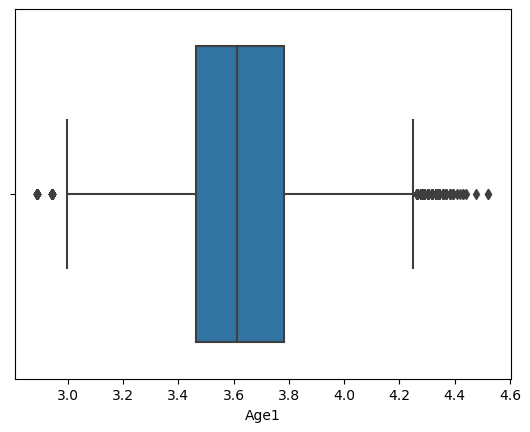

In [21]:
# After log transformation 
 
sns.boxplot(x=df['Age1']) 
plt.show()

### Bivariate Analysis

#### Here our main interest is to get an understanding as to how the given attributes relate to the 'churn' status

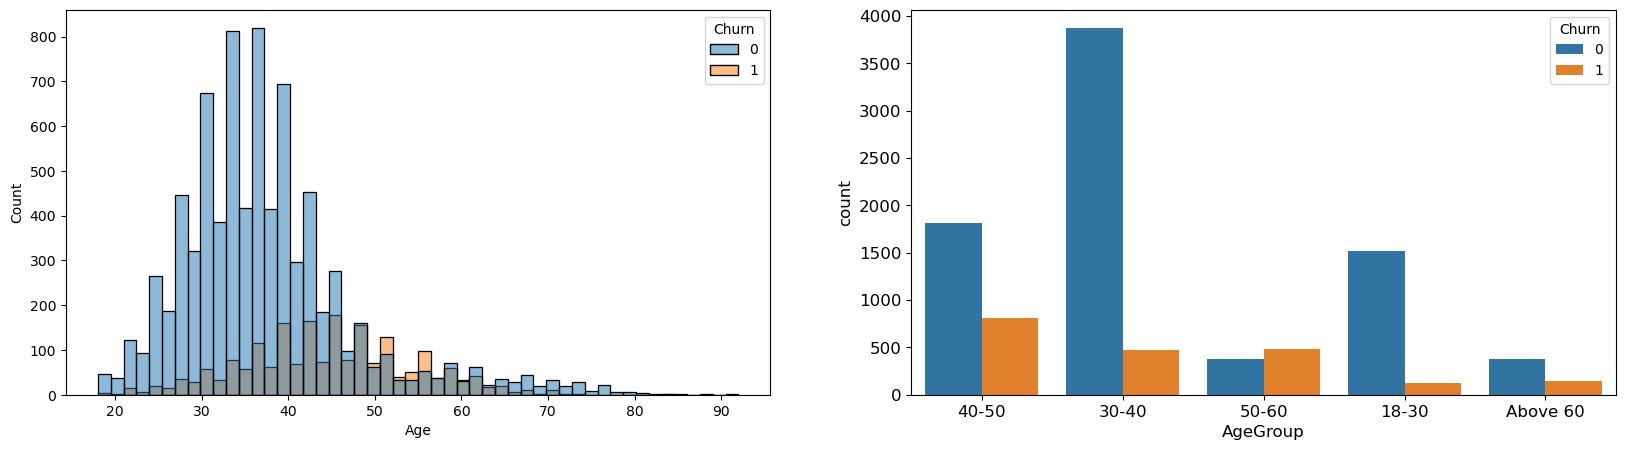

In [22]:
 fig, axarr = plt.subplots(1,2, figsize=(20, 5)) 
plt.xticks(size=12) 
plt.xlabel('Age Groups',size=12) 
plt.yticks(size=12) 
plt.ylabel('Count of Customers',size=12) 
sns.histplot(data=df,x='Age',hue='Churn',bins=50,ax=axarr[0]) 
 
plt.xticks(size=12) 
plt.xlabel('Age Groups',size=12) 
plt.yticks(size=12) 
plt.ylabel('Count of Customers',size=12) 
sns.countplot(data=df,x ='AgeGroup',hue='Churn',ax=axarr[1]) 
plt.show()

Insight:

40-50 is the age group for which churn rate is maximum. Also for age group 50-60 customers churned is more than customer retention.The bank may need to review their target market or review the strategy for retention between the different age groups

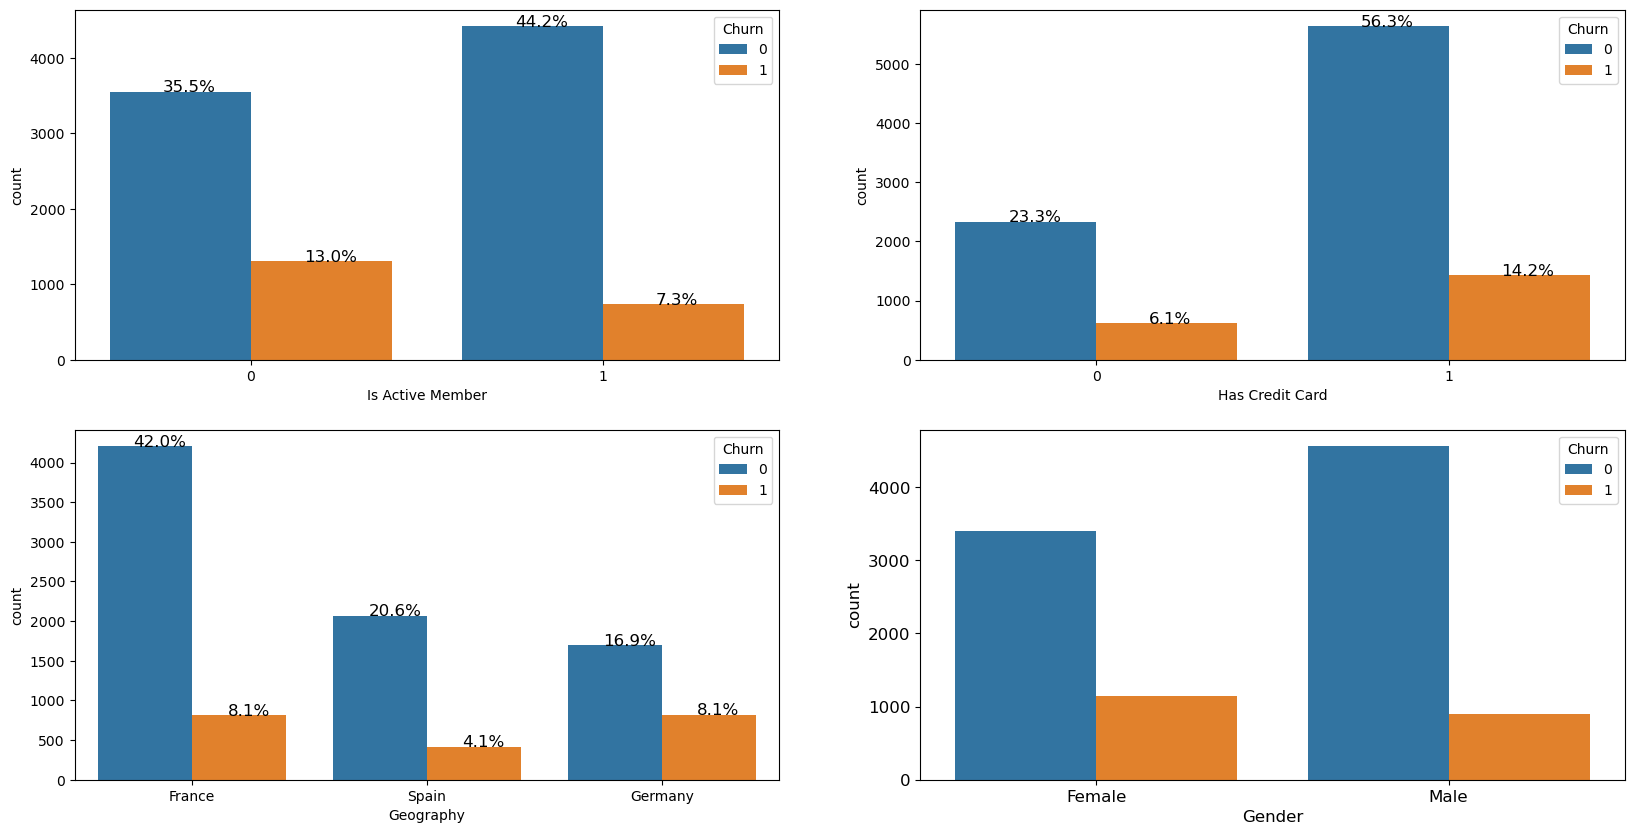

In [23]:
fig, axarr = plt.subplots(2,2, figsize=(20, 10)) 
 
plt.xticks(size=12) 
plt.xlabel('Is Active Member (Yes/No)',size=12) 
plt.yticks(size=12) 
plt.ylabel('Count of Customers',size=12) 
ax = sns.countplot(data=df,x='Is Active Member',hue='Churn',ax=axarr[0][0]) 
total = len(df['Is Active Member']) 
for p in ax.patches: 
    percentage = '{:.1f}%'.format(100 * p.get_height()/total) 
    x = p.get_x() + p.get_width() / 2 - 0.05 
    y = p.get_y() + p.get_height() 
    ax.annotate(percentage, (x, y), size = 12) 
 
plt.xticks(size=12) 
plt.xlabel('Has Credit Card (Yes/No)',size=12) 
plt.yticks(size=12) 
plt.ylabel('Count of Customers',size=12)     
ax = sns.countplot(data=df,x='Has Credit Card',hue='Churn',ax=axarr[0][1])     
total = len(df['Has Credit Card']) 
for p in ax.patches: 
    percentage = '{:.1f}%'.format(100 * p.get_height()/total) 
    x = p.get_x() + p.get_width() / 2 - 0.05 
    y = p.get_y() + p.get_height() 
    ax.annotate(percentage, (x, y), size = 12) 
 
plt.xticks(size=12) 
plt.xlabel('Geography',size=12) 
plt.yticks(size=12) 
plt.ylabel('Count of Customers',size=12) 
ax = sns.countplot(data=df,x='Geography',hue='Churn',ax=axarr[1][0]) 
total = len(df['Geography']) 
for p in ax.patches: 
    percentage = '{:.1f}%'.format(100 * p.get_height()/total) 
    x = p.get_x() + p.get_width() / 2 - 0.05 
    y = p.get_y() + p.get_height() 
    ax.annotate(percentage, (x, y), size = 12) 
     
plt.xticks(size=12) 
plt.xlabel('Gender',size=12) 
plt.yticks(size=12) 
plt.ylabel('Count of Customers',size=12)   
sns.countplot(data=df,x='Gender',hue='Churn',ax=axarr[1][1]) 
 
plt.show()

Insight :

1. Chances of a non-active member churning out is double the chances of an active member churning out. Bank needs to check with the customers for being inactive , give them some offers plan.
2. Majority of the customers that churned are those with credit cards. Given that majority of the customers have credit cards could prove this to be just a coincidence.
3. Almost half of the customers are from France followed by Spain and Germany each having 25% customers.Hence churn rate is also maximum for France there but Germany showed the same churn rate despite lower count of customers.
4. Male to female ratio of customers is 5:4.Clearly as observed churn probability is more for a female customer

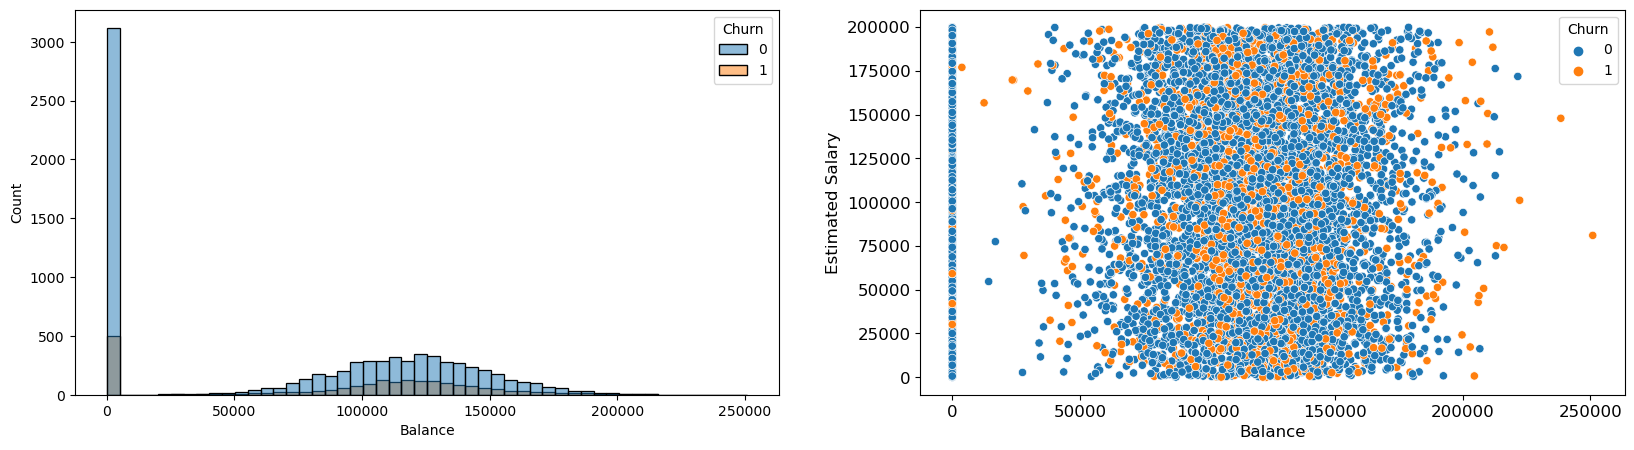

In [24]:
 fig, axarr = plt.subplots(1,2, figsize=(20, 5)) 
plt.xticks(size=12) 
plt.xlabel('Balance',size=12) 
plt.yticks(size=12) 
plt.ylabel('Count of Customers',size=12) 
sns.histplot(data=df,x='Balance',hue='Churn',bins=50,ax = axarr[0]) 
plt.xticks(size=12) 
plt.xlabel('Balance',size=12) 
plt.yticks(size=12) 
plt.ylabel('Estimated Salary',size=12) 
sns.scatterplot(data=df,x='Balance',y='Estimated Salary',hue='Churn',ax=axarr[1]) 
plt.show()

Insights:

Probability of customers having zero balance churning out is maximum.Many people keep 0 balance no matter how high or low their estimated salary is

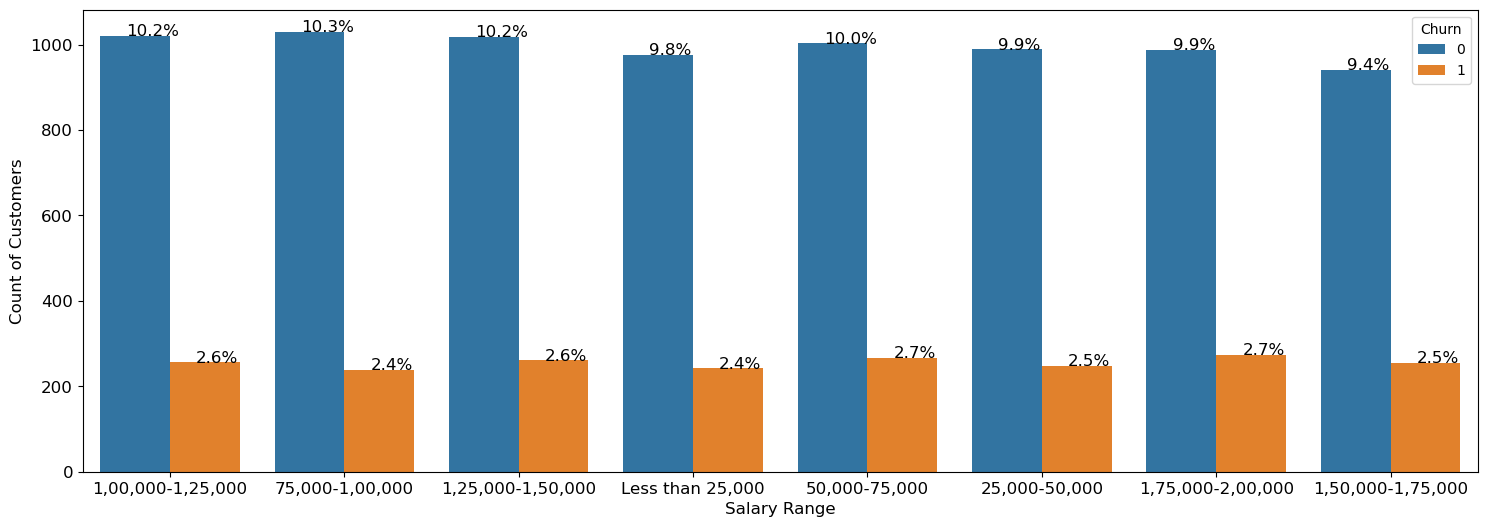

In [25]:
 plt.figure(figsize=(18,6)) 
ax = sns.countplot(data=df,x='SalaryRange',hue='Churn') 
plt.xticks(size=12) 
plt.xlabel('Salary Range',size=12) 
plt.yticks(size=12) 
plt.ylabel('Count of Customers',size=12) 
total = len(df['SalaryRange']) 
for p in ax.patches: 
    percentage = '{:.1f}%'.format(100 * p.get_height()/total) 
    x = p.get_x() + p.get_width() / 2 - 0.05 
    y = p.get_y() + p.get_height() 
    ax.annotate(percentage, (x, y), size = 12) 
plt.show()

Insights:

Around one-fourth customers have salary between 150000-175000 and more churn rate for these customers is observed which shows bank is losing it's valuable customers.

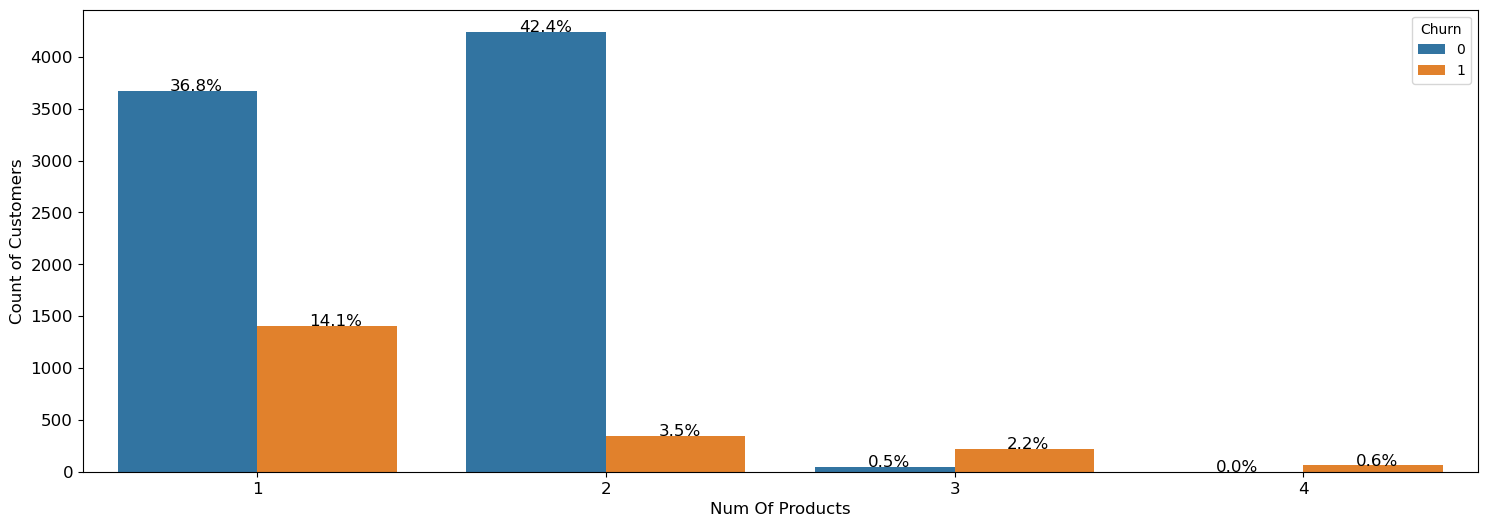

In [26]:
 plt.figure(figsize=(18,6)) 
ax = sns.countplot(data=df,x='Num Of Products',hue='Churn') 
plt.xticks(size=12) 
plt.xlabel('Num Of Products',size=12) 
plt.yticks(size=12) 
plt.ylabel('Count of Customers',size=12) 
total = len(df['Num Of Products']) 
for p in ax.patches: 
    percentage = '{:.1f}%'.format(100 * p.get_height()/total) 
    x = p.get_x() + p.get_width() / 2 - 0.05 
    y = p.get_y() + p.get_height() 
    ax.annotate(percentage, (x, y), size = 12) 
plt.show()

Insight:

Maximum customers who churned out have used 1 product only (14% out of total 20%). Maybe bank needs to focus on convincing customers to use more of their services and products

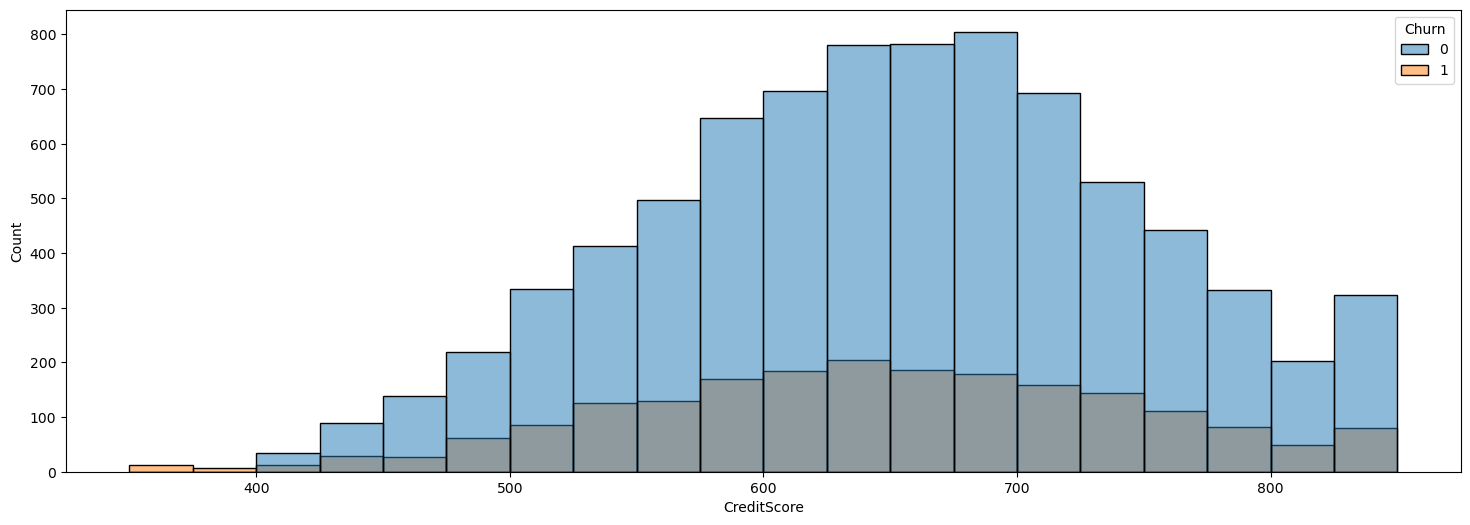

In [27]:
plt.figure(figsize=(18,6)) 
sns.histplot(data=df,x='CreditScore',bins=20,hue='Churn') 
plt.show()

There is no significant difference in the credit score distribution between retained and churned customers.

In [28]:
 # Drop the columns formed for EDA as it's no longer needed. Also drop age and keep logar
 df.drop(columns=['SalaryRange','AgeGroup','Age'],inplace=True)

### Target check for balanced or Imbalanced data

In [29]:
round(df['Churn'].value_counts()/len(df)*100,2)

Churn
0    79.63
1    20.37
Name: count, dtype: float64

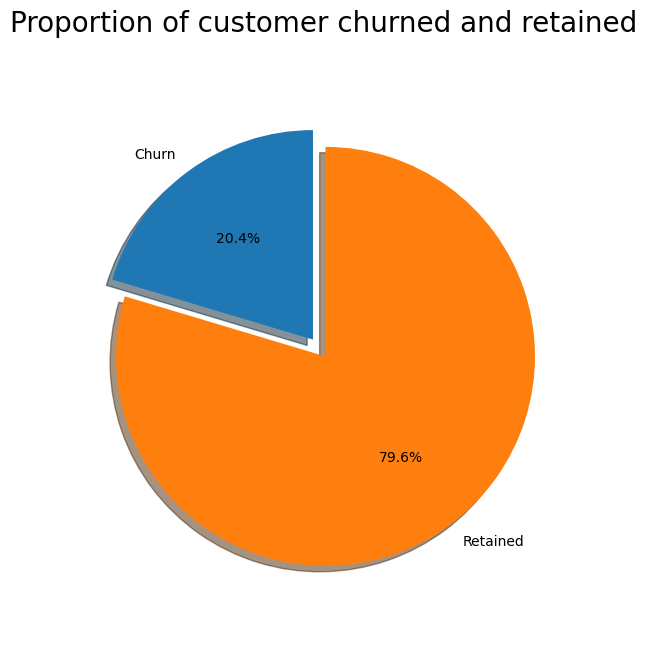

In [30]:
labels = 'Churn', 'Retained' 
sizes = [df.Churn[df['Churn']==1].count(), df.Churn[df['Churn']==0].count()] 
explode = (0, 0.1) 
fig1, ax1 = plt.subplots(figsize=(6 , 8)) 
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', 
shadow=True, startangle=90) 
ax1.axis('equal') 
plt.title("Proportion of customer churned and retained", size = 20) 
plt.show()

### Predictive Behaviour Modeling

About 20% of the customers have churned. We need to ensure that the chosen model does predict with great accuracy this 20% as it is of interest to the bank to identify and keep this bunch as opposed to accurately predicting the customers that are retained

In [31]:
#conda install -c conda-forge imbalanced-learn

In [32]:
from sklearn.model_selection import  train_test_split 
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler 
from sklearn.linear_model import LogisticRegression


from imblearn.pipeline import Pipeline 

In [33]:
 x = df.drop(columns=['Churn']) 
y  = df['Churn'] 
 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=52) 
print("Shape of X_train:" ,x_train.shape) 
print("Shape of X_test:" ,x_test.shape) 

Shape of X_train: (8000, 10)
Shape of X_test: (2000, 10)


In [34]:
 unique, count = np.unique(y_train ,return_counts= True) 
target_org_valuecount= {k:v for (k,v) in zip (unique,count)} 
target_org_valuecount

{0: 6384, 1: 1616}

In [35]:
 x_test.head()

,CreditScore,Geography,Gender,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Age1
8002,590,Spain,Male,1,0.00,2,0,0,133535.99,3.610918
5438,679,France,Male,7,160515.37,1,1,0,121904.14,3.526361
2369,648,Spain,Female,7,118241.02,1,1,0,172586.89,3.988984
8370,612,France,Male,3,121394.42,1,1,0,164081.42,3.465736
7443,634,France,Female,2,87413.19,1,1,0,63340.65,3.178054


In [36]:
categorical_cols = ['Gender','Geography'] 
 
 
numerical_cols = ['Age1', 
                  'Balance', 
                  'Num Of Products', 
                  'Has Credit Card', 
                  'Is Active Member', 
                  'CreditScore', 
                  'Tenure', 
                  'Estimated Salary']

### Encoding and Scaling

In [37]:
 # Bundle preprocessing for numerical and categorical data 
preprocessor = ColumnTransformer( 
    transformers=[ 
        ('num', StandardScaler(), numerical_cols), 
        ('cat', OneHotEncoder(), categorical_cols) 
    ]) 

### SMOTE

In [38]:
 from imblearn.over_sampling import SMOTE 
 
smt = SMOTE(random_state=52) 

### Logistic Regression

In [39]:
logmodel=LogisticRegression()

### Pipeline

In [40]:
 pipe = Pipeline(steps=[('preprocessor', preprocessor), 
                            ('smote', smt), 
                            ('logmodel', logmodel) 
                          ]) 
 
# Preprocessing of training data, fit model  
pipe.fit(x_train, y_train) 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age1', 'Balance',
                                                   'Num Of Products',
                                                   'Has Credit Card',
                                                   'Is Active Member',
                                                   'CreditScore', 'Tenure',
                                                   'Estimated Salary']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Gender', 'Geography'])])),
                ('smote', SMOTE(random_state=52)),
                ('logmodel', LogisticRegression())])

In [41]:
 y_predicted = pipe.predict(x_test) 

In [42]:
y_predicted 

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [43]:
from sklearn.metrics import classification_report 
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1579
           1       0.38      0.67      0.49       421

    accuracy                           0.70      2000
   macro avg       0.64      0.69      0.64      2000
weighted avg       0.78      0.70      0.73      2000



In [44]:
 from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 
 
from sklearn.metrics import mean_squared_error as MSE 
print("Training score: ",pipe.score(x_train, y_train)) 
 
print("Testing score: ",pipe.score(x_test, y_test)) 
 
print("MSE score: ",MSE(y_test,y_predicted)) 
 
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_predicted))) 
print("Precision: {:.2}".format(precision_score(y_test, y_predicted))) 
print("Recall: {:.2f}".format(recall_score(y_test, y_predicted))) 
print("F1-score: {:.2f}".format(f1_score(y_test, y_predicted))) 

Training score:  0.713125
Testing score:  0.701
MSE score:  0.299
Accuracy: 0.70
Precision: 0.38
Recall: 0.67
F1-score: 0.49


In [45]:
 from sklearn.metrics import confusion_matrix
 confusion_matrix(y_test,y_predicted)

array([[1120,  459],
       [ 139,  282]], dtype=int64)

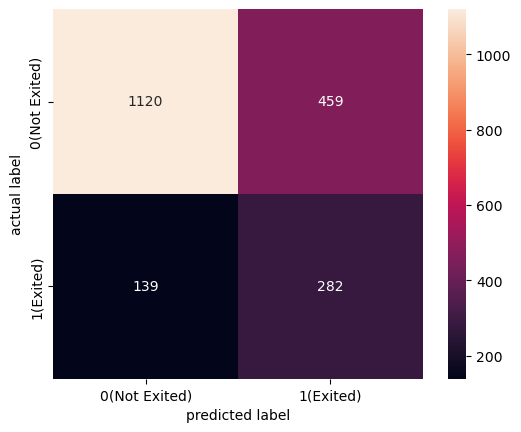

In [46]:
 cnf_matrix = confusion_matrix(y_test,y_predicted) 
np.set_printoptions(precision=2) 
sns.heatmap(cnf_matrix, square=True, annot=True, fmt='d', cbar=True, 
                        xticklabels=['0(Not Exited)', '1(Exited)'], 
                        yticklabels=['0(Not Exited)', '1(Exited)']) 
plt.ylabel('actual label') 
plt.xlabel('predicted label') 
plt.show() 

In [47]:
 from sklearn.metrics import roc_curve, auc 
 
fpr_dt, tpr_dt, _ = roc_curve(y_test,y_predicted) 
roc_auc_dt = auc(fpr_dt, tpr_dt) 
 
y_predicted = pipe.predict(x_test) 
y_predicted 

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

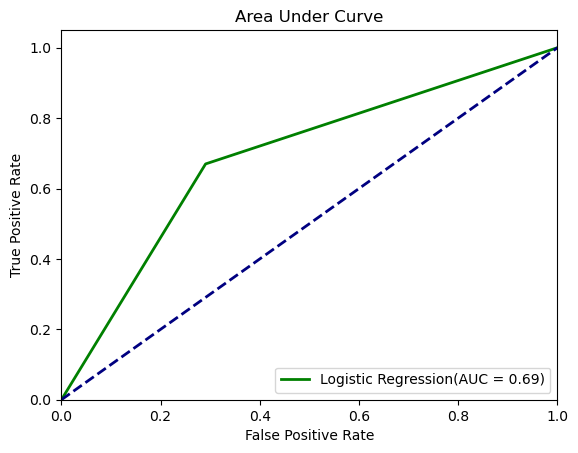

In [48]:
plt.figure(1) 
lw = 2 
plt.plot(fpr_dt, tpr_dt, color='green', 
         lw=lw, label='Logistic Regression(AUC = %0.2f)' % roc_auc_dt) 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') 
 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Area Under Curve') 
plt.legend(loc="lower right") 
plt.show()

TypeError: lineplot() takes from 0 to 1 positional arguments but 2 were given

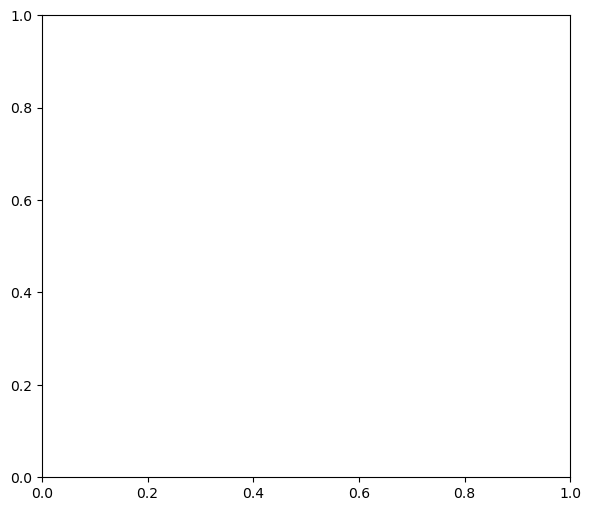

In [49]:
 from sklearn.metrics import accuracy_score, confusion_matrix, classification_report ,precision_recall_curve
yhat = pipe.predict_proba(x_test) 
precision, recall, _ = precision_recall_curve(y_test, yhat[:, 1]) 
plt.figure(dpi=100, figsize=(15, 6)) 
plt.subplot(121) 
sns.lineplot([0, 1], [1, 0], linestyle='--', label='No Skill') 
sns.lineplot(recall, precision, marker='.', label=pipe.__class__.__name__) 
plt.title("Recall vs Precision Curve") 
plt.xlabel('Recall') 
plt.ylabel('Precision') 
plt.legend() 
plt.show()

In [50]:
col =['Training Score','Testing Score','MSE score','Accuracy','Precision','Recall','F1-Score']
 
model_log_report1 = pd.DataFrame(  
                    { 
                    'Training Score': [round(pipe.score(x_train, y_train),2)], 
                    'Testing Score' : [round(pipe.score(x_test, y_test),2)],  
                    'MSE score': [round(MSE(y_test,y_predicted),2)], 
                    'Accuracy' : [round(accuracy_score(y_test, y_predicted),2)], 
                    'Precision': [round(precision_score(y_test, y_predicted),2)], 
                    'Recall'   : [round(recall_score(y_test,y_predicted),2)], 
                    'F1-Score' : [round(f1_score(y_test,y_predicted),2)] 
                    }, 
                    columns=col,index=['Logistic Regression'])

### Decision Tree Classifier

In [51]:
x = df.drop(columns=['Churn']) 
y  = df['Churn'] 
 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=52)

In [52]:
from sklearn.model_selection import GridSearchCV 
from sklearn.tree import DecisionTreeClassifier 

decision_tree = DecisionTreeClassifier(random_state=52, max_depth=6, criterion = "entropy",
                                   max_features= None, 
                                   min_samples_split=15, 
                                   min_samples_leaf=12) 

In [53]:
pipe = Pipeline(steps=[('preprocessor', preprocessor), 
                            ('smote', smt), 
                            ('decision_tree', decision_tree) 
                          ]) 
 
# Preprocessing of training data, fit model  
pipe.fit(x_train, y_train) 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age1', 'Balance',
                                                   'Num Of Products',
                                                   'Has Credit Card',
                                                   'Is Active Member',
                                                   'CreditScore', 'Tenure',
                                                   'Estimated Salary']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Gender', 'Geography'])])),
                ('smote', SMOTE(random_state=52)),
                ('decision_tree',
                 DecisionTreeClassifier(criterion='entropy', max_depth=6,
                                        min_samples_leaf=12,
                                        min_samples_split=15,
                                        random_state=52))])

In [54]:
y_predicted = pipe.predict(x_test)

In [55]:
 from sklearn.metrics import mean_squared_error as MSE 
print("Training score: ",pipe.score(x_train, y_train)) 
 
print("Testing score: ",pipe.score(x_test, y_test)) 
 
print("MSE score: ",MSE(y_test,y_predicted)) 
 
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_predicted))) 
print("Precision: {:.2}".format(precision_score(y_test, y_predicted))) 
print("Recall: {:.2f}".format(recall_score(y_test, y_predicted))) 
print("F1-score: {:.2f}".format(f1_score(y_test, y_predicted)))

Training score:  0.78875
Testing score:  0.7885
MSE score:  0.2115
Accuracy: 0.79
Precision: 0.5
Recall: 0.76
F1-score: 0.60


In [56]:
 from sklearn.metrics import roc_curve, auc 
 
fpr_dt, tpr_dt, _ = roc_curve(y_test,y_predicted) 
roc_auc_dt = auc(fpr_dt, tpr_dt) 
 
y_predicted = pipe.predict(x_test) 
y_predicted

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

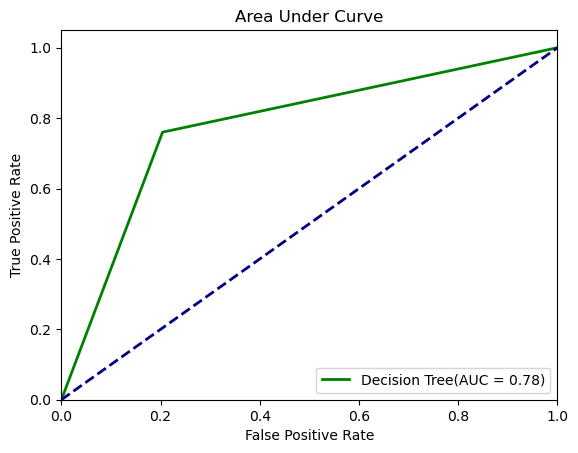

In [57]:
 plt.figure(1) 
lw = 2 
plt.plot(fpr_dt, tpr_dt, color='green', 
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt) 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') 
 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Area Under Curve') 
plt.legend(loc="lower right") 
plt.show()

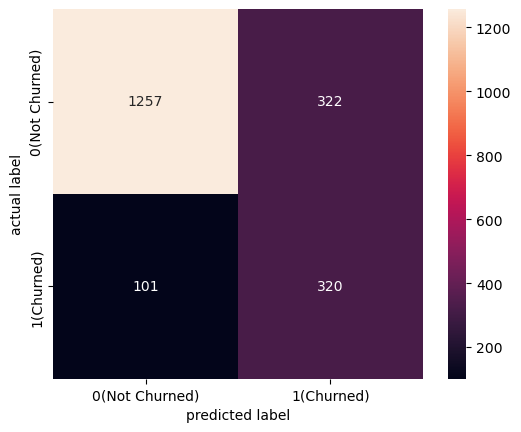

In [58]:
 from sklearn.metrics import confusion_matrix 
 
cnf_matrix = confusion_matrix(y_test,y_predicted) 
np.set_printoptions(precision=2) 
sns.heatmap(cnf_matrix, square=True, annot=True, fmt='d', cbar=True, 
                        xticklabels=['0(Not Churned)', '1(Churned)'], 
                        yticklabels=['0(Not Churned)', '1(Churned)']) 
plt.ylabel('actual label') 
plt.xlabel('predicted label') 
plt.show()

In [59]:
model_log_report2 = pd.DataFrame(  
                    { 
                    'Training Score': [round(pipe.score(x_train, y_train),2)], 
                    'Testing Score' : [round(pipe.score(x_test, y_test),2)],  
                    'MSE score': [round(MSE(y_test,y_predicted),2)], 
                    'Accuracy' : [round(accuracy_score(y_test, y_predicted),2)], 
                    'Precision': [round(precision_score(y_test, y_predicted),2)], 
                    'Recall'   : [round(recall_score(y_test,y_predicted),2)], 
                    'F1-Score' : [round(f1_score(y_test,y_predicted),2)] 
                    }, 
                    columns=col,index=['Decision Tree'])

### Random Forest Classifier

In [60]:
 x = df.drop(columns=['Churn']) 
y  = df['Churn'] 
 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=52)

In [61]:
from sklearn.ensemble import RandomForestClassifier 
random_forest = RandomForestClassifier(max_depth=10, 
                                       n_estimators = 50, random_state=52, 
                                       bootstrap=True, 
                                       max_features=None, 
                                       min_samples_split=5, 
                                       min_samples_leaf=5, 
                                       criterion='gini') 

In [62]:
 pipe = Pipeline(steps=[('preprocessor', preprocessor), 
                            ('smote', smt), 
                            ('random_forest', random_forest) 
                          ])
     # Preprocessing of training data, fit model  
pipe.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age1', 'Balance',
                                                   'Num Of Products',
                                                   'Has Credit Card',
                                                   'Is Active Member',
                                                   'CreditScore', 'Tenure',
                                                   'Estimated Salary']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Gender', 'Geography'])])),
                ('smote', SMOTE(random_state=52)),
                ('random_forest',
                 RandomForestClassifier(max_depth=10, max_features=None,
                                        min_samples_leaf=5, min_samples_split=5,
                                        n_estimators=50, random_state=52))])

In [63]:
 y_predicted = pipe.predict(x_test) 

In [64]:
from sklearn.metrics import mean_squared_error as MSE 
print("Training score: ",pipe.score(x_train, y_train)) 
 
print("Testing score: ",pipe.score(x_test, y_test)) 
 
print("MSE score: ",MSE(y_test,y_predicted)) 
 
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_predicted))) 
print("Precision: {:.2}".format(precision_score(y_test, y_predicted))) 
print("Recall: {:.2f}".format(recall_score(y_test, y_predicted))) 
print("F1-score: {:.2f}".format(f1_score(y_test, y_predicted))) 

Training score:  0.873375
Testing score:  0.8295
MSE score:  0.1705
Accuracy: 0.83
Precision: 0.58
Recall: 0.72
F1-score: 0.64


In [65]:
from sklearn.metrics import roc_curve, auc 
 
fpr_dt, tpr_dt, _ = roc_curve(y_test,y_predicted) 
roc_auc_dt = auc(fpr_dt, tpr_dt) 
 
y_predicted = pipe.predict(x_test) 
y_predicted 

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

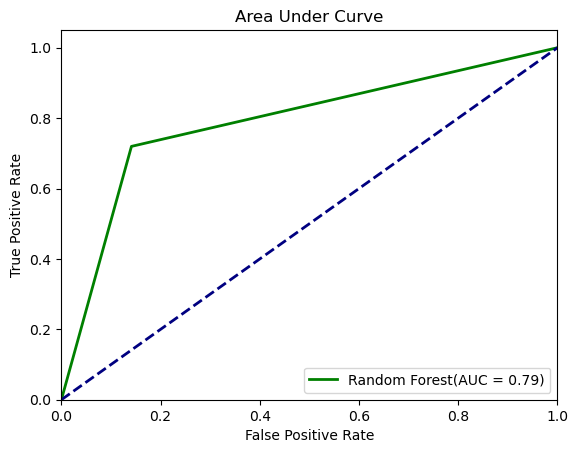

In [66]:
plt.figure(1) 
lw = 2 
plt.plot(fpr_dt, tpr_dt, color='green', 
         lw=lw, label='Random Forest(AUC = %0.2f)' % roc_auc_dt) 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') 
 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Area Under Curve') 
plt.legend(loc="lower right") 
plt.show()

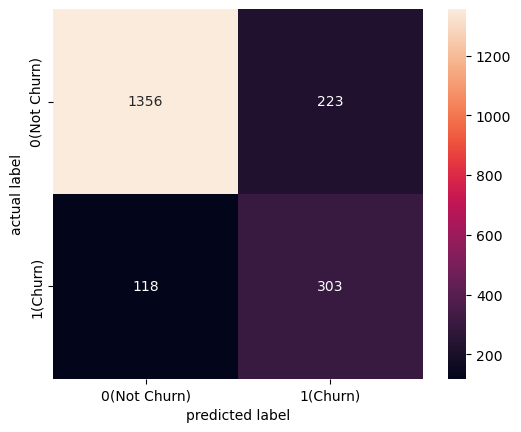

In [67]:
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(y_test,y_predicted) 
np.set_printoptions(precision=2) 
sns.heatmap(cnf_matrix, square=True, annot=True, fmt='d', cbar=True, 
xticklabels=['0(Not Churn)', '1(Churn)'], 
yticklabels=['0(Not Churn)', '1(Churn)']) 
plt.ylabel('actual label') 
plt.xlabel('predicted label') 
plt.show()

In [68]:
model_log_report3 = pd.DataFrame(  
{ 
'Training Score': [round(pipe.score(x_train, y_train),2)], 
'Testing Score' : [round(pipe.score(x_test, y_test),2)],  
'MSE score': [round(MSE(y_test,y_predicted),2)], 
'Accuracy' : [round(accuracy_score(y_test, y_predicted),2)], 
'Precision': [round(precision_score(y_test, y_predicted),2)], 
'Recall'   : [round(recall_score(y_test,y_predicted),2)], 
'F1-Score' : [round(f1_score(y_test,y_predicted),2)] 
}, 
columns=col,index=['Random Forest'])

## Boosting Algorithm

### XG Boost

In [69]:
 x = df.drop(columns=['Churn']) 
y  = df['Churn'] 
 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=52)

In [70]:
#conda install -c anaconda py-xgboost

In [71]:
!pip install xgboost

In [72]:
import xgboost as xgb 
 
xgb = xgb.XGBClassifier(random_state=52,  
                        colsample_bytree= 0.7, 
                        gamma= 4, 
                        learning_rate= 0.1, 
                        max_depth= 6, 
                        n_estimators= 100, 
                        reg_lambda= 1, 
                        subsample= 0.8) 

In [73]:
pipe = Pipeline(steps=[('preprocessor', preprocessor), 
                             ('smote', smt), 
                             ('xgb', xgb) 
                         ]) 
 
# Preprocessing of training data, fit model  
pipe.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age1', 'Balance',
                                                   'Num Of Products',
                                                   'Has Credit Card',
                                                   'Is Active Member',
                                                   'CreditScore', 'Tenure',
                                                   'Estimated Salary']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Gender', 'Geography'])])),
                ('smote', SMOTE(random_state=52)),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               cols...
                               feature_types=None, gamma=4, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=52, ...))])

In [74]:
y_predicted = pipe.predict(x_test)

In [75]:
from sklearn.metrics import mean_squared_error as MSE 
 
print("Training score: ",pipe.score(x_train, y_train)) 
print("Testing score: ",pipe.score(x_test, y_test)) 
print("MSE score: ",MSE(y_test,y_predicted)) 
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_predicted))) 
print("Precision: {:.2}".format(precision_score(y_test, y_predicted))) 
print("Recall: {:.2f}".format(recall_score(y_test, y_predicted))) 
print("F1-score: {:.2f}".format(f1_score(y_test, y_predicted))) 

Training score:  0.866875
Testing score:  0.853
MSE score:  0.147
Accuracy: 0.85
Precision: 0.65
Recall: 0.65
F1-score: 0.65


In [76]:
from sklearn.metrics import roc_curve, auc 
 
fpr_dt, tpr_dt, _ = roc_curve(y_test,y_predicted) 
roc_auc_dt = auc(fpr_dt, tpr_dt) 
 
y_predicted = pipe.predict(x_test) 
y_predicted

array([0, 0, 1, ..., 1, 0, 1])

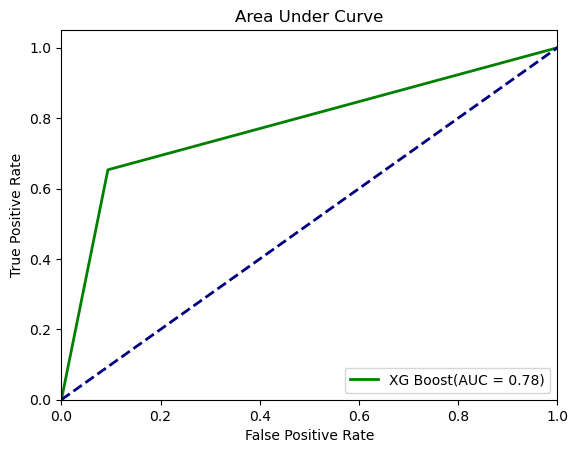

In [77]:
plt.figure(1) 
lw = 2 
plt.plot(fpr_dt, tpr_dt, color='green', 
         lw=lw, label='XG Boost(AUC = %0.2f)' % roc_auc_dt) 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') 
 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Area Under Curve') 
plt.legend(loc="lower right") 
plt.show()

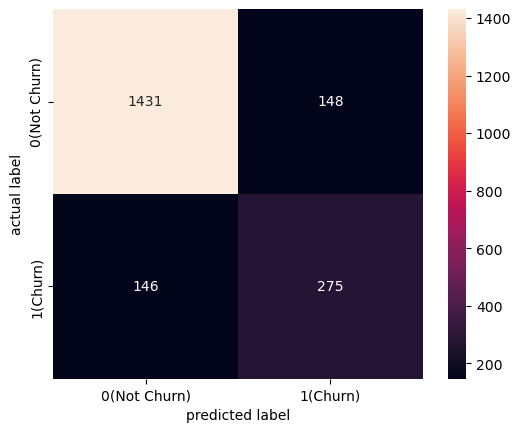

In [78]:
from sklearn.metrics import confusion_matrix 
 
cnf_matrix = confusion_matrix(y_test,y_predicted) 
np.set_printoptions(precision=2) 
sns.heatmap(cnf_matrix, square=True, annot=True, fmt='d', cbar=True, 
                        xticklabels=['0(Not Churn)', '1(Churn)'], 
                        yticklabels=['0(Not Churn)', '1(Churn)']) 
plt.ylabel('actual label') 
plt.xlabel('predicted label') 
plt.show()

In [79]:
model_log_report4 = pd.DataFrame(  
                    { 
                    'Training Score': [round(pipe.score(x_train, y_train),2)], 
                    'Testing Score' : [round(pipe.score(x_test, y_test),2)],  
                    'MSE score': [round(MSE(y_test,y_predicted),2)], 
                    'Accuracy' : [round(accuracy_score(y_test, y_predicted),2)], 
                    'Precision': [round(precision_score(y_test, y_predicted),2)], 
                    'Recall'   : [round(recall_score(y_test,y_predicted),2)], 
                    'F1-Score' : [round(f1_score(y_test,y_predicted),2)] 
                    }, 
                    columns=col,index=['Xgboost'])

## Comparing Models

### We need confidence in our positive class predictions (churn) when taking retention actions.


In [80]:
 col =['Training Score','Testing Score','MSE score','Accuracy','Precision','Recall','F1-Score']
 model_comp = pd.DataFrame(columns=col) 
model_comp = pd.concat((model_log_report1,model_log_report2,model_log_report3,model_log_report4))

In [81]:
model_comp

,Training Score,Testing Score,MSE score,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.71,0.70,0.30,0.70,0.38,0.67,0.49
Decision Tree,0.79,0.79,0.21,0.79,0.50,0.76,0.60
Random Forest,0.87,0.83,0.17,0.83,0.58,0.72,0.64
Xgboost,0.87,0.85,0.15,0.85,0.65,0.65,0.65
